In [396]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [397]:
df = pd.read_csv('data.csv')

In [398]:
df.head()

,X,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [399]:
X = df.iloc[:, 0].to_numpy().reshape(-1,1)
y = df.iloc[:, 1].to_numpy().reshape(-1,1)

In [400]:
X.shape

(100, 1)

In [401]:
# Creating an array containing only ones
ones = np.ones((X.shape[0], 1))
X = np.concatenate((X, ones), axis=1)

In [402]:
X.shape, y.shape

((100, 2), (100, 1))

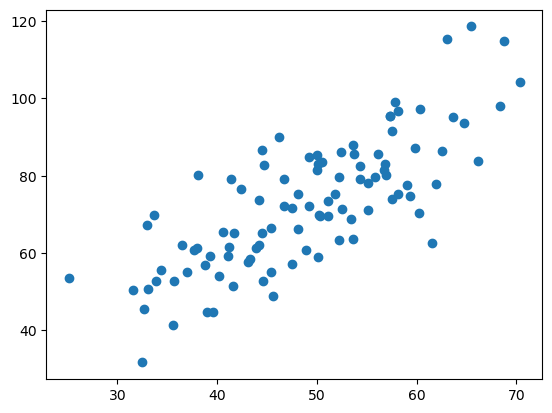

In [403]:
plt.scatter(df.iloc[:, 0].to_numpy(), y)

## Setting the hyperparameters

In [404]:
alpha = 0.0001   # Learning rate
iters = 1000    # Iterations

# Theta is the row vector
theta = np.array([[1.0, 1.0]])

In [405]:
def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [406]:
computeCost(X, y, theta)

319.4063158939815

In [407]:
def gradientDescent(X, y, theta, alpha, iters):
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T - y) * X, axis=0)
        cost = computeCost(X, y, theta)
        if i % 10 == 0: # just look at cost every ten loops for debugging
            print(cost)
    return (theta, cost)

In [408]:
g, reduced_cost = gradientDescent(X, y, theta, alpha, iters)

204.50666115574055
56.52985181213651
56.05030590326913
56.04868285547168
56.04860838575526
56.04853893898854
56.04846951372054
56.048400093745066
56.0483306790092
56.0482612695124
56.04819186525426
56.04812246623441
56.048053072452404
56.04798368390788
56.04791430060044
56.047844922529706
56.047775549695224
56.04770618209666
56.0476368197336
56.04756746260565
56.047498110712375
56.047428764053464
56.04735942262844
56.04729008643696
56.04722075547861
56.047151429752965
56.047082109259684
56.047012793998334
56.04694348396856
56.04687417916992
56.046804879602035
56.04673558526455
56.04666629615701
56.04659701227904
56.046527733630256
56.04645846021026
56.04638919201868
56.04631992905506
56.046250671319065
56.04618141881028
56.046112171528314
56.04604292947275
56.04597369264323
56.04590446103932
56.045835234660665
56.04576601350684
56.045696797577456
56.04562758687215
56.045558381390464
56.04548918113209
56.04541998609654
56.04535079628351
56.04528161169254
56.04521243232326
56.04514325817

In [409]:
print(f'''g: {theta_final}
Reduced cost: {reduced_cost}''')

g: [[1.45914242 1.03536024]]
Reduced cost: 56.04197377798171


## Regression line

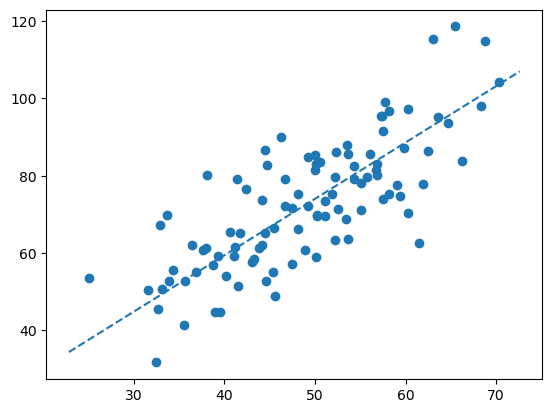

In [411]:
plt.scatter(df.iloc[:, 0].to_numpy(), y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim()) 
# x_vals = df.iloc[:, 0].to_numpy() 
y_vals = g[0][0] * x_vals + g[0][1]
plt.plot(x_vals, y_vals, '--')
